# Getting Started Tutorial

This page explains the main concepts required to define and solve an optimization problem with the package [alogos](package_references.html). A shorter introduction can be found in the [Quickstart Example](quickstart.html).

## Overview

Three main ingredients are required to tackle an optimization problem with this package:

1. **Search space**: This package deals with optimization problems in which the search space is a formal language that is defined by a context-free grammar. This may sound complicated, but simply means that the search space is a set of strings and the goal is to find an optimal string in it. Therefore the first step in defining an optimization problem with alogos is specifying a grammar, because its language becomes the search space. Specifying a context-free grammar can be done by providing a text description in BNF or EBNF notation and will be explained later in this tutorial.

<center>
  <img height="140" src="../images/search_space.png"/>
</center>

2. **Search goal**: The second step in defining an optimization problem is clarifying what is meant by an "optimal" string. In other words, the user needs to provide a concrete search goal or objective. This requires a mechanism that puts an order on the strings in the search space, which means they get ranked from best to worst. The most common way to do so is defining an objective function, which gets a string as input and returns a number as output. The number represents a quality score or fitness of the corresponding string. Such an assignment of a numerical quantity to every object in a set puts a so-called weak order on them. Weak here means that multiple strings can have the same quality score and therefore are equally good. For this reason, there may be several optimal strings which all share the optimal value. In general this is no problem, because it still allows to search for an optimal string with optimal value. The only further information required from the user is whether the "best" value means the lowest or highest number, i.e. whether the goal is minimization or maximization.

<center>
  <img height="170" src="../images/search_goal.png"/>
</center>

3. **Search method**: Now that the optimization problem is defined, the third step is choosing an optimization method that can work on any search space a user can define. Such general methods are known as metaheuristics. They stand in contrast to exact methods and problem-specific heuristics, which only work on a narrow range of search spaces that have a special structure to them (e.g. continuity and convexity). A well-known metaheuristic that is also provided by this package is an evolutionary algorithm. It needs to be instantiated with the search space, the search goal and optional parameters such as population size and mutation rate. Once done, it can be used to search for the best string in the grammar's language, either one step at a time or running it until a termination criterion is met. Importantly, the algorithm does not evaluate the objective function on every string in the search space, because that would be completely infeasiable in most cases, but it rather samples random items and moves in directions that look promising. Three important implications are:

    - The search is stochastic, so there is no guarantee to find a good or optimal solution in a single run.
    - The search can be stopped at any moment and the best solution found so far can be returned.
    - The more time is given to the search, the better the solution tends to become. If a problem is simple, an optimal solution can be found in little time. If a problem is very hard, it may take quite some time to find a good solution and it is less likely to reach a global optimum in limited time.

<center>
  <img height="170" src="../images/search_method.png"/>
</center>

The rest of this tutorial goes through these three steps and provides concrete code examples for each of them. This should hopefully enable you to define and solve your own optimization problems with alogos.

## Importing the package

Python allows to import a package under another name, which is frequently used to abbreviate the full name. The suggestion for this package is to import ``alogos`` under the shorter name ``al``.

In [1]:
import alogos as al

Other packages also have a conventional abbreviation that should be used during the import. The following two are well-known examples.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 1) Search space

In Grammar-Guided Genetic Programming (G3P) the search space is the language of a grammar. This section therefore explains:

- A) What is a grammar?
- B) How can a grammar be defined?
- C) What can a grammar be used for?

### A) What is a grammar?

- Formal language theory studies how different classes of formal languages can be defined and what properties they have. Here is a short summary of central concepts of formal language theory, which paves the way to defining a context-free grammar:

  - A [formal language](https://en.wikipedia.org/wiki/Formal_language) is a set of strings. It can contain a finite or infinite number of elements. All strings must be formed over a single alphabet.
  - A [string](https://en.wikipedia.org/wiki/String_(computer_science)) is a finite sequence of symbols taken from an alphabet.
  - An [alphabet](https://en.wikipedia.org/wiki/Alphabet_(formal_languages)) is a finite set of symbols.
  - A [symbol](https://en.wikipedia.org/wiki/Symbol_(programming)) is a unique identifier consisting of a single character or multiple ones.
  - A finite language can be defined by listing the strings it contains, but for an infinite language this is not possible. Instead a formalism needs to be used for implicitly defining the language. The two most prominent formalisms for defining languages are 1) [grammars](https://en.wikipedia.org/wiki/Formal_grammar) and 2) [automata](https://en.wikipedia.org/wiki/Abstract_machine).
- A [formal grammar](https://en.wikipedia.org/wiki/Formal_grammar) is a [rewrite system](https://en.wikipedia.org/wiki/Rewriting) that consists of symbols and [rewrite rules](https://en.wikipedia.org/wiki/Production_(computer_science)), also known as production rules. The rules allow to transform symbols into other symbols. To know when to stop, there is a distinction between two kinds of symbols: Nonterminal symbols can be thought of as variables or placeholders, which can be rewritten into other symbols by applying a rule. Terminal symbols, on the other hand, can not be rewritten and mark the end point of a derivation. To know where to start, a grammar comes with a special nonterminal symbol called the start symbol. A derivation is a sequence of rule applications, which begins with the single start symbol of a grammar, repeatedly transforms nonterminal symbols into other symbols, and eventually arrives in a sequence consisting only of terminal symbols that can not be rewritten any further. Such a resulting sequence of terminal symbols is a string of the grammar's language. By using a different sequence of rule applications another string can be formed. The set of all strings that can be generated in this way with a grammar form its language. In contrast to generating strings, a grammar can also be used in the opposite direction. Given a certain string, a grammar can be used to check whether that string is part of the language. Furthermore, it is also possible to analyze the structure of the string by trying to find a derivation for it, which is a process known as [parsing](https://en.wikipedia.org/wiki/Parsing).

  In precise mathematical terms, a grammar is usually defined as a tuple ``(N, T, P, S)`` where

  - ``N`` is a set of nonterminal symbols.
  - ``T`` is a set of terminal symbols, which has no overlap with ``N``.
  - ``S`` is the start symbol, which is a nontermminal symbol and therefore an element of ``N``.
  - ``P`` is a set of production rules. Different kinds of grammars can be distinguished by putting different restrictions on the form of these rules. This influences how expressive the grammars are and hence what classes of languages can be defined by them.

- A [context-free grammar (CFG)](https://en.wikipedia.org/wiki/Context-free_grammar) is a type of grammar where the rules need to be in following form: The left-hand side of a rule is a single nonterminal symbol and it can be rewritten into its right-hand side, which is an arbitrary sequence of nonterminal and terminal symbols. This means a nonterminal can be rewritten into something else, no matter which other symbols it is surrounded by. This means the context in which a nonterminal appears does not matter for the rule application. Therefore a grammar with such rules is called context-free.

#### References

Two popular textbooks in formal language theory are used by many university courses and offer thorough introductions:

- [Introduction to Automata Theory, Languages, and Computation](https://en.wikipedia.org/wiki/Introduction_to_Automata_Theory,_Languages,_and_Computation)
- [Introduction to the Theory of Computation](https://en.wikipedia.org/wiki/Introduction_to_the_Theory_of_Computation)


### B) How can a grammar be defined?

A grammar can be specified by a text that unambigously describes all components of the grammar. Such a text is part of a [metalanguage](https://en.wikipedia.org/wiki/Metalanguage), which means a language that describes another language. The form of a metalanguage is defined by a [metasyntax](https://en.wikipedia.org/wiki/Metasyntax), which explains what a valid expression in a metalanguage has to look like. Different metalanguages for the description of a context-free grammar have been invented, such as the following widely used examples:

- [Backus-Naur Form (BNF)](https://en.wikipedia.org/wiki/Backus%E2%80%93Naur_form) was developed in the 1950s to define the programming language Algol. This is one of the oldest and most influential formats and still in use today. Over time, some extensions were added to it in order to make the definition of complex languages a bit easier and more concise.
- [Extended Backus-Naur Form (EBNF)](https://en.wikipedia.org/wiki/Extended_Backus%E2%80%93Naur_form) adds some mechanisms to BNF like allowing symbols to be optional or repeated. Unfortunately EBNF comes in many different variants. This package currently supports some frequently used mechanisms and metasymbols, but there is more out there, so not every flavor of EBNF can be read at the moment.
- [Augmented Backus-Naur Form (ABNF)](https://en.wikipedia.org/wiki/Augmented_Backus%E2%80%93Naur_form) is another popular development on top of BNF, which is currently not supported by this package.

In summary, this package currently supports the creation of a grammar from BNF and EBNF text. Unfortunately there is no authoritative formalization of the metasyntax of both BNF and EBNF. For this reason, different variants of BNF and EBNF can be encountered in practice. This package can recognize many of them. For example, in BNF the nonterminal symbols are usually enclosed by two bracket symbols ``<`` and ``>``, while the terminal symbols are not enclosed by any metasymbols. A simple variant of BNF, however, is to enclose terminal symbols in quote characters ``"``, which has several advantages, such as allowing to include the emtpy string ``""``, whitespace ``" "`` and brackets `"<"` into a grammar definition. This package can recognize such a variant of BNF by passing suitable parameters to the Grammar class so that it knows to expect terminals to be enclosed in quote characters.

#### References

If you want to know where BNF came from and what its original form looked like, here are the primary sources using a [History of ALGOL](https://www.softwarepreservation.org/projects/ALGOL):

  - 1959, Backus: [The syntax and semantics of the proposed international algebraic language of the Zuerich ACM-GRAMM conference](https://www.softwarepreservation.org/projects/ALGOL/paper/Backus-ICIP-1959.pdf/view)

    - p. 126: "a proposed International Algebraic Language (IAL) or ALGOL"
    - p. 129: "In the description of IAL syntax which follows we shall need some **metalinguistic conventions** for characterizing various strings of symbols. To begin, we shall need **metalinguistic formulae**."
  - 1960, Backus & Naur: [Report on the Algorithmic Language ALGOL 60](https://www.softwarepreservation.org/projects/ALGOL/report/Algol60_report_CACM_1960_June.pdf/view)

    - p. 301: "The syntax will be described with the aid of metalinguistic formulae.""
  - 1960, Backus & Naur: [Revised Report on the Algorithmic Language ALGOL 60](https://www.softwarepreservation.org/projects/ALGOL/report/Algol60_revised_report_CACM.pdf/view)
  
    - p. 4: "The syntax will be described with the aid of metalinguistic formulae."
  - 1964, Knuth: [Backus Normal Form vs. Backus Naur Form](https://dl.acm.org/doi/10.1145/355588.365140)
  
    - p. 735: "Several of us working in the field have never cared for the name Backus Normal Form because it isn't a "Normal Form" in the conventional sense"
    - p. 736: "Naur's additions (particularly (v)) are quite important. Furthermore, if it had not been for Naur's work in recognizing the potential of Backus's ideas and popularizing them with the ALGOL committee, Backus's work would have become virtually lost;"
    - p. 736: "Therefore I propose that henceforth we always say "**Backus Naur Form**" instead of Backus Normal Form, when referring to such a syntax."

#### Example 1: A simple grammar defined by text in BNF

This example shows how a grammar can be defined by text in [Backus-Naur Form (BNF)](https://en.wikipedia.org/wiki/Backus%E2%80%93Naur_form). The grammar in turn defines a simple finite language, where each element is a decimal number with three digits after the comma. Two exemplary strings of that language are ``"1.618"`` and ``"3.141"``.

BNF uses following conventions:

- Nonterminal symbols are enclosed in the brackets `<` and `>`. Example: `<digit>`
- Terminal symbols are enclosed in no metasymbols. Example: `4`
- The left-hand side and right-hand side of a rule are separated by `::=`. Example: `<digit> ::= 1`
- Multiple rules for the same nonterminal can be written in one go, where `|` is used as separator between them. Example: `<digit> ::= 1 | 2`
- The first nonterminal symbol at the beginning of the text is the start symbol of the grammar.

Even within this convention for BNF there are multiple ways to write a specification for the same grammar:

- Option 1: Put each rule on a separate line.

In [3]:
bnf_text = """
<number> ::= <digit> . <digit><digit><digit>
<digit>  ::= 0
<digit>  ::= 1
<digit>  ::= 2
<digit>  ::= 3
<digit>  ::= 4
<digit>  ::= 5
<digit>  ::= 6
<digit>  ::= 7
<digit>  ::= 8
<digit>  ::= 9
"""

grammar1 = al.Grammar(bnf_text=bnf_text)

- Option 2: Provide all rules for a nonterminal on a single line by using the metasymbol ``|`` as a rule separator.

In [4]:
bnf_text = """
<number> ::= <digit> . <digit><digit><digit>
<digit>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
"""

grammar1b = al.Grammar(bnf_text=bnf_text)

- Option 3: Put each rule on separate lines, but also use the metasymbol ``|`` as rule separator, so that the same nonterminal does not have to be repeated many times on the left-hand side.

In [5]:
bnf_text = """
<number> ::= <digit> . <digit><digit><digit>
<digit>  ::= 0
           | 1
           | 2
           | 3
           | 4
           | 5
           | 6
           | 7
           | 8
           | 9
"""

grammar1c = al.Grammar(bnf_text=bnf_text)

These three BNF texts specify the same grammar. It can be checked in code whether they are actually equal in the sense that they have exactly the same symbols and rules. As a side note, it is not possible to check whether grammars are equivalent in the sense that they define the same language because that is an [undecidable problem](https://en.wikipedia.org/wiki/Undecidable_problem#Examples_of_undecidable_problems).

In [6]:
print(grammar1 == grammar1b == grammar1c)

True


To clarify the meaning of the BNF text, here is what the corresponding grammar consists of:

- Two nonterminal symbols: ``number`` and ``digit``
- Eleven terminal symbols: ``.``, ``0``, ``1``, ``2``, ``3``, ``4``, ``5``, ``6``, ``7``, ``8`` and ``9``
- A start symbol: ``number``
- Eleven rules

  - One rule describes how ``number`` can be rewritten into a sequence of five symbols, four of which are nonterminals that can be also rewritten further.
  - Ten rules describe how ``digit`` can be rewritten into different terminals.

It is a good idea to check if the generated grammar actually contains the components you expect from the provided BNF or EBNF description, because sometimes forgetting a metasymbol like `<` can lead to a valid grammar with unexpected components.

In [7]:
print(grammar1)

Nonterminal symbols:
  0: NT('number')
  1: NT('digit')

Terminal symbols:
  0: T('.')
  1: T('0')
  2: T('1')
  3: T('2')
  4: T('3')
  5: T('4')
  6: T('5')
  7: T('6')
  8: T('7')
  9: T('8')
  10: T('9')

Start symbol:
  NT('number')

Production rules:
  0: NT('number') -> NT('digit') T('.') NT('digit') NT('digit') NT('digit')
  1: NT('digit') -> T('0')
  2: NT('digit') -> T('1')
  3: NT('digit') -> T('2')
  4: NT('digit') -> T('3')
  5: NT('digit') -> T('4')
  6: NT('digit') -> T('5')
  7: NT('digit') -> T('6')
  8: NT('digit') -> T('7')
  9: NT('digit') -> T('8')
  10: NT('digit') -> T('9')


#### Example 2: A real-world grammar defined by text in EBNF

The example in this section shows how a grammar can be defined by text in [Extended Backus-Naur Form (EBNF)](https://en.wikipedia.org/wiki/Extended_Backus%E2%80%93Naur_form). It is a real-world example taken from the [Python grammar](https://docs.python.org/3/reference/grammar.html), which defines the Python programming language. The example deals not with the full grammar, but focuses on the part of it that defines [floating point literals](https://docs.python.org/3/reference/lexical_analysis.html#floating-point-literals). This is a description of all valid ways how a floating point number can be written in a Python program, which includes normal cases such as `1.618` and `1.0e-3`, but also more exotic ones such as `3.1_4_00_0E+0_0_000` or `.1E001`. Let us first check if such symbol sequences are actually recognized as valid float numbers in Python:

In [8]:
print(1.618)
print(1.0e-3)
print(3.1_4_00_0E+0_0_000)
print(.1E001)

1.618
0.001
3.14
1.0


EBNF differs from BNF in two ways:

1. It uses different metasymbols:
  
    - Nonterminal symbols are not enclosed in any metasymbols in EBNF, instead of `<` and `>` in BNF.
    - Terminal symbols are enclosed in quotation marks `"` in EBNF, instead of using no metasymbols for this in BNF.
    - The rule definition symbol is `= ` in EBNF, instead of `::=` in BNF.

2. It adds special metasymbols on top of BNF that allow to express some rules in a more compact form. Following metasymbols are currently supported by this package:

    - Symbols inside square brackets `[]` are optional.
        - Example: `S = "a" ["b"]` defines a language containing the strings `"a"` and `"ab"`.
    - Symbols inside parentheses `()` are grouped and it is possible to use the rule separator `|` to describe alternatives.
        - Example: `S = "a" ("b" | "c")` defines a language containing the strings `"ab"` and `"ac"`.
    - It is also possible to use the rule separator `|` inside square brackets `[` and `]` to describe alternatives that are also optional.
        - Example: `S = "a" ["b" | "c"]` defines a language containing the strings `"a"`, `"ab"` and `"ac"`.
    - The new metasymbol `*` means that the directly preceding item can be repeated 0 to n times. An item can be a single symbol but also a bracket expression or parentheses expression.
      - Example: `S = "a" "b"*` defines a language containing the strings `"a"`, `"ab"`, `"abb"`, `"abbb"` and so on.
    - The new metasymbols can also be used in combination.
        - Example: `S = ("0" | "1")*` defines the language of all binary strings (including the empty string)

Here are the same examples in code:

In [9]:
ebnf_examples = [
    'S = "a" ["b"]',
    'S = "a" ("b" | "c")',
    'S = "a" ["b" | "c"]',
    'S = "a" "b"*',
    'S = ("0" | "1")*',
]

for ebnf in ebnf_examples:
    gr = al.Grammar(ebnf_text=ebnf)
    lang = gr.generate_language(sort_order='shortlex', max_steps=5)  # max_steps limits the length of derivations
    print(lang)

['a', 'ab']
['ab', 'ac']
['a', 'ab', 'ac']
['a', 'ab', 'abb', 'abbb']
['', '0', '1', '00', '01', '10', '11', '000', '001', '010', '011', '100', '101', '110', '111']


The new metasymbols introduced by EBNF can be removed from the grammar specification by inserting new nonterminal symbols and rules for them until the specification looks again like BNF. This has some implications:

- The number of nonterminals and rules in a given EBNF description can be lower than what is contained in the generated grammar.
- EBNF and BNF can be used to define exactly the same grammars, namely the class of context-free grammars. EBNF just allows to express certain cases more concisely and therefore is often preferred in practice.

With this introduction to EBNF, it is now possible to specify the grammar that defines [floating point literals](https://docs.python.org/3/reference/lexical_analysis.html#floating-point-literals) in Python. Note that it is written in an EBNF variant that uses `::=` as defining symbol instead of the usual `=`, but the Grammar class in alogos accepts it by passing the argument `defining_symbol='::='` during its creation:

In [10]:
ebnf_text = """
floatnumber   ::= pointfloat | exponentfloat
pointfloat    ::= [digitpart] fraction | digitpart "."
exponentfloat ::= (digitpart | pointfloat) exponent
digitpart     ::= digit (["_"] digit)*
fraction      ::= "." digitpart
exponent      ::= ("e" | "E") ["+" | "-"] digitpart
digit         ::= "0" | "1" | "2" | "3" | "4" | "5" | "6" | "7" | "8" | "9"
"""

grammar2 = al.Grammar(ebnf_text=ebnf_text, defining_symbol='::=')

In [11]:
print(grammar2)

Nonterminal symbols:
  0: NT('floatnumber')
  1: NT('pointfloat')
  2: NT('pointfloat_§0')
  3: NT('exponentfloat')
  4: NT('exponentfloat_§0')
  5: NT('digitpart')
  6: NT('digitpart_§2')
  7: NT('digitpart_§0')
  8: NT('digitpart_§1')
  9: NT('fraction')
  10: NT('exponent')
  11: NT('exponent_§0')
  12: NT('exponent_§1')
  13: NT('digit')

Terminal symbols:
  0: T('.')
  1: T('')
  2: T('_')
  3: T('e')
  4: T('E')
  5: T('+')
  6: T('-')
  7: T('0')
  8: T('1')
  9: T('2')
  10: T('3')
  11: T('4')
  12: T('5')
  13: T('6')
  14: T('7')
  15: T('8')
  16: T('9')

Start symbol:
  NT('floatnumber')

Production rules:
  0: NT('floatnumber') -> NT('pointfloat')
  1: NT('floatnumber') -> NT('exponentfloat')
  2: NT('pointfloat') -> NT('pointfloat_§0') NT('fraction')
  3: NT('pointfloat') -> NT('digitpart') T('.')
  4: NT('pointfloat_§0') -> NT('digitpart')
  5: NT('pointfloat_§0') -> T('')
  6: NT('exponentfloat') -> NT('exponentfloat_§0') NT('exponent')
  7: NT('exponentfloat_§0') -> N

The printed output reveals that new nonterminals and rules were automatically introduced by alogos in order to handle the EBNF metasymbols `[]`, `()` and `*`. This is done by using the name of the original nonterminal and adding the suffix `_§i` to it, where `i` is a number that gets incremented. There are also some mechanisms to prevent unnecessary redundance in added parts.

### C) What can a grammar be used for?

#### Print the components of the grammar

In [12]:
print(grammar1)

Nonterminal symbols:
  0: NT('number')
  1: NT('digit')

Terminal symbols:
  0: T('.')
  1: T('0')
  2: T('1')
  3: T('2')
  4: T('3')
  5: T('4')
  6: T('5')
  7: T('6')
  8: T('7')
  9: T('8')
  10: T('9')

Start symbol:
  NT('number')

Production rules:
  0: NT('number') -> NT('digit') T('.') NT('digit') NT('digit') NT('digit')
  1: NT('digit') -> T('0')
  2: NT('digit') -> T('1')
  3: NT('digit') -> T('2')
  4: NT('digit') -> T('3')
  5: NT('digit') -> T('4')
  6: NT('digit') -> T('5')
  7: NT('digit') -> T('6')
  8: NT('digit') -> T('7')
  9: NT('digit') -> T('8')
  10: NT('digit') -> T('9')


####  Access the components of the grammar

In [13]:
for sym in grammar1.nonterminal_symbols:
    print('<{}>'.format(sym))

<number>
<digit>


In [14]:
for sym in grammar1.terminal_symbols:
    print('"{}"'.format(sym))

"."
"0"
"1"
"2"
"3"
"4"
"5"
"6"
"7"
"8"
"9"


In [15]:
# Check if the start symbol is as expected an element of the set of nonterminals
print(grammar1.start_symbol in grammar1.nonterminal_symbols)

True


#### Visualize the grammar as syntax diagram

A [syntax diagram](https://en.wikipedia.org/wiki/Syntax_diagram) is a common way to visually represent a context-free grammar.

In [16]:
# Possible in any Python interpreter: open the figure in a webbrowser
fig = grammar1.plot()
fig.display()

# Possible in Jupyter: embed the figure in the notebook
grammar1

Nonterminal symbols:
  0: NT('number')
  1: NT('digit')

Terminal symbols:
  0: T('.')
  1: T('0')
  2: T('1')
  3: T('2')
  4: T('3')
  5: T('4')
  6: T('5')
  7: T('6')
  8: T('7')
  9: T('8')
  10: T('9')

Start symbol:
  NT('number')

Production rules:
  0: NT('number') -> NT('digit') T('.') NT('digit') NT('digit') NT('digit')
  1: NT('digit') -> T('0')
  2: NT('digit') -> T('1')
  3: NT('digit') -> T('2')
  4: NT('digit') -> T('3')
  5: NT('digit') -> T('4')
  6: NT('digit') -> T('5')
  7: NT('digit') -> T('6')
  8: NT('digit') -> T('7')
  9: NT('digit') -> T('8')
  10: NT('digit') -> T('9')

#### Generate the grammar's language

The language of a grammar is the set of all strings is can generate or recognize. Mathematically a language is a set, but here it is implemented as a list so it can have an order. This also implies that index-based access is possible, which allows to easily look at different examples of strings within the language.

In [17]:
language = grammar1.generate_language()
print(len(language))

10000


In [18]:
print(language[0])
print(language[42])
print(language[-1])

0.000
0.042
9.999


#### Generate a random derivation tree, visualize it, and access its contents

A derivation is created by beginning with the start symbol and repeatedly applying rules to nonterminal symbols until only terminal symbols are left. If this is achieved, a string of the grammar's language has been derived. By choosing random rules at each step it is possible create random derivations and strings.

A derivation tree is a data structure that captures the rules used throughout a derivation, but it does not remember the order in which they were applied. For this reason, a derivation tree represents multiple derivations but a single string. The string can be derived by applying the same rules to the same nonterminals in different order and this is what gives rise to multiple derivations.

In [19]:
derivation_tree = grammar1.generate_derivation_tree()

In [20]:
# Possible in any Python interpreter: open the figure in a webbrowser
fig = derivation_tree.plot()
fig.display()

# Possible in Jupyter: embed the figure in the notebook
derivation_tree

(<number>(<digit>(0).<digit>(6)<digit>(9)<digit>(8)))

Read the leftmost derivation from the tree, which means that in each step the leftmost nonterminal is rewritten.

In [21]:
print(derivation_tree.derivation())

<number>
=> <digit>.<digit><digit><digit>
=> 0.<digit><digit><digit>
=> 0.6<digit><digit>
=> 0.69<digit>
=> 0.698


Read the rightmost derivation from the tree, which means that in each step the leftmost nonterminal is rewritten.

In [22]:
print(derivation_tree.derivation(derivation_order='rightmost'))

<number>
=> <digit>.<digit><digit><digit>
=> <digit>.<digit><digit>8
=> <digit>.<digit>98
=> <digit>.698
=> 0.698


Read a random derivation from the tree by choosing in each step a random nonterminal to be rewritten next.

In [23]:
print(derivation_tree.derivation(derivation_order='random'))

<number>
=> <digit>.<digit><digit><digit>
=> <digit>.6<digit><digit>
=> 0.6<digit><digit>
=> 0.6<digit>8
=> 0.698


Read the string from the derivation tree by concatenating the terminal symbols in its leaf nodes.

In [24]:
print(derivation_tree.string())

0.698


#### Generate a random derivation

A random derivation can be generated directly without explicitly using a derivation tree as intermediate step.

In [25]:
derivation = grammar1.generate_derivation()
print(derivation)

<number>
=> <digit>.<digit><digit><digit>
=> 8.<digit><digit><digit>
=> 8.4<digit><digit>
=> 8.48<digit>
=> 8.481


#### Generate a random string

A random string can be generated directly without explicitly using a derivation tree as intermediate step.

The first grammar produces decimal numbers with three digits after the comma. These numbers range from `0.000` to `9.999`.

In [26]:
for _ in range(15):
    print(grammar1.generate_string())

6.916
7.649
2.017
1.310
7.808
9.273
4.145
5.063
8.459
6.580
1.218
9.513
5.494
0.941
9.357


The second grammar produces floating point numbers that are part of the Python programming language.

In [27]:
for _ in range(15):
    print(grammar2.generate_string())

73_3e+7
13.
78_5_94e24
2E0
.5_4
5.
662e-68
97E-2_7_5_50
7.
8_3_5e+8
4E+5
2E+8
77_3_74.E9
9.7
.0E-98_18


#### Check if a string is part of the grammar's language

In [28]:
print(grammar1.recognize_string('3.141'))
print(grammar1.recognize_string('6.0221408e+23'))

True
False


In [29]:
print(grammar2.recognize_string('3.141'))
print(grammar2.recognize_string('6.0221408e+23'))

True
True


#### Parse a string of the grammar's language

Parsing means to analyze the structure of a given string. This is done by finding a derivation tree that produces the string. In this case it is often called a parse tree, but alogos uses the same data structure for it.

The first grammar is simple and can derive a given string by a few rule applications.

In [30]:
parse_tree = grammar1.parse_string('3.141')
parse_tree

(<number>(<digit>(3).<digit>(1)<digit>(4)<digit>(1)))

In [31]:
print(parse_tree.derivation())

<number>
=> <digit>.<digit><digit><digit>
=> 3.<digit><digit><digit>
=> 3.1<digit><digit>
=> 3.14<digit>
=> 3.141


The second grammar is more complex and requires more rule applications to derive the same string. The symbol ɛ in the derivation tree represents the empty string `""`.

In [32]:
parse_tree = grammar2.parse_string('3.141')
parse_tree

(<floatnumber>(<pointfloat>(<pointfloat_§0>(<digitpart>(<digit>(3)<digitpart_§2>()))<fraction>(.<digitpart>(<digit>(1)<digitpart_§2>(<digitpart_§2>(<digitpart_§2>()<digitpart_§1>(<digitpart_§0>()<digit>(4)))<digitpart_§1>(<digitpart_§0>()<digit>(1))))))))

In [33]:
print(parse_tree.derivation())

<floatnumber>
=> <pointfloat>
=> <pointfloat_§0><fraction>
=> <digitpart><fraction>
=> <digit><digitpart_§2><fraction>
=> 3<digitpart_§2><fraction>
=> 3<fraction>
=> 3.<digitpart>
=> 3.<digit><digitpart_§2>
=> 3.1<digitpart_§2>
=> 3.1<digitpart_§2><digitpart_§1>
=> 3.1<digitpart_§2><digitpart_§1><digitpart_§1>
=> 3.1<digitpart_§1><digitpart_§1>
=> 3.1<digitpart_§0><digit><digitpart_§1>
=> 3.1<digit><digitpart_§1>
=> 3.14<digitpart_§1>
=> 3.14<digitpart_§0><digit>
=> 3.14<digit>
=> 3.141


## 2) Search goal

This package can be used to solve optimization problems from many domains. A particularly well-studied field is numerical optimization, which often has the goal to find the global minimum of some numerical function. If the function has suitable properties, there are often very efficient optimization methods available, e.g. for sufficiently smooth functions there is [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), which currently powers deep learning. If the function, however, does not come with nice mathematical properties, e.g. when is not differentiable and highly nonlinear, there are not as efficient algorithms available. For this reason, let's try to solve a simple example of such a function with alogos.

The two grammars we have specified above define languages where each string represents a number. Therefore we can try to find the minimum value of a numerical function that expects a single number as input. This is a toy problem, but to make it a bit more interesting, a nonlinear function with many local minima can be used. The question that shall be answered about such a [univariate](https://en.wikipedia.org/wiki/Univariate), [nonlinear](https://en.wikipedia.org/wiki/Nonlinear_system) function `f` is: For what input value does `f` return its smallest output value, and what is that output value? Or in other words, which argument `x` leads to minimal `y=f(x)`?

Definition of the numerical function we want to investigate:

In [34]:
def f(x):
    """Take a single number and return a single number."""
    if x < 0.0:
        y = 2.0
    elif x > 4.0:
        y = 4.0
    else:
        y = (x-0.5)**2 + np.sin(x * 15.0) + np.cos(x * 9.0) - 2.0
    return y

Plot of the function to get a better idea of its structure:

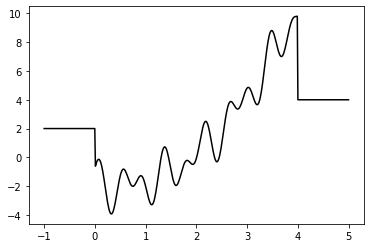

In [35]:
x = np.linspace(-1.0, +5.0, 500)
y = [f(xi) for xi in x]

plt.plot(x, y, c='black');

This already shows that it is a toy problem, otherwise it would not be possible to visually identify a minimum. We can look at the values used for plotting to get an idea what the search algorithm is expected to find:

In [36]:
y_min = np.min(y)
x_min = x[np.argmin(y)]
print('x:', x_min)
print('y:', y_min)

x: 0.3226452905811623
y: -3.9323169136706335


### A) Objective function

To solve an optimization problem with alogos, the user needs to define an objective function. Such a function takes a string of the grammar's language as input and needs to return a number as output. This allows to assign a quality score to each candidate solution in the search space, and therefore enables the algorithm to search for the best solution. Note that it is no problem if the function fails for some strings, e.g. because they don't represent a candidate that can be meaningfully evaluated. The package handles such a case by assigning the worst possible score to the string that caused the function to fail. Be careful though that the function does not contain a bug that lets it fail on all strings. This can easily be checked by manually evaluating it for a few strings.

In [37]:
def objective_function(string):
    """Assign a quality score to a string of the grammar's language."""
    # Evaluate the string, which in the case of our grammars results in a number
    x = eval(string)

    # Insert that number into the numerical function
    y = f(x)
    
    # Return the value of the numerical function, since that is what we want to minimize
    return y

Check if it works as expected on some strings:

In [38]:
objective_function('1.234')

-1.6841109718823701

In [39]:
objective_function('5e+123_456')

4.0

### B) Objective

The second ingredient a user needs to provide to define a search goal is whether the objective is to find the minimal or maximal value of the objective function. This will be passed as simple parameter to the search algorithm, either `objective="min"` for a minimization task or `objective="max"` for a maximization task.

## 3) Search method

Different [metaheuristic](https://en.wikipedia.org/wiki/Metaheuristic) methods can be used to search for an optimal string in a grammar's language. Every search method has the task to find a good or optimal solution in the entire search space within limited time. For a nontrivial space, this can only be achieved if the objective function is evaluated just for a tiny fraction of the strings in it. Therefore the main question for a search method is how to choose the strings that shall be evaluated. If there is no structure in the search space, it is not possible to perform better on average than random sampling. To search a space more efficiently than that, some structure has to be known and exploited. In G3P a grammar is used to define the search space, therefore the structure of the grammar can be used by a search method. For example, if a good string has been found, then exchanging one terminal for another generates a very similar string which might have a very similar fitness and therefore it is reasonable to assume it could be a slightly better solution. In contrast, if a nonterminal near the root of a derivation tree is exchanged then a quite different string can be generated with rather unknown quality. Based on such thoughts, the goal is to build search strategies that on average can explore structured search spaces much more efficiently than random sampling. Some search strategies such as [Simulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing) operate on a single candidate solution that is repeatedly modified and either accepted or rejected in each step, while others such as [Evolutionary Algorithms](https://en.wikipedia.org/wiki/Evolutionary_algorithm) work on a group of candidate solutions throughout the whole exporation of the search space.

### Evolutionary algorithm

The field of Grammar-Guided Genetic Programming (G3P) primarily uses evolutionary algorithms, which is in part due to the historical development of the field. Accordingly, alogos also provides an implementation of an evolutionary algorithm as its first and main optimization algorithm. Other methods, however, can be easily built by reusing the components provided by the modular implementation of different G3P systems in alogos.

As mentioned before, an evolutionary algorithm acts on a group of candidate solutions throughout the search and is therefore known as a population-based metaheuristic. It is inspired by the process of natural evolution, but the algorithm mimics the phenomenon only superficially, because in in complex biological systems a lot of subtle mechanisms are at play. An evolutionary algorithm uses a simple cycle of random variation and fitness-based selection of candidate solutions in order to gradually improve the fitness of a population over several rounds. To give a clearer picture, here are the main terms introduced by the literature on evolutionary algorithms:

- **Individual**: An individual represents a single candidate solution. It comes with a genotype, phenotype and fitness. The best individual is the one with the best fitness. At the end of a search run, the algorithm returns this best individual. Its phenotype is the best string that was discovered in the grammar's language.

  - The **genotype** is a representation that 1) serves as the data from which a phenotype can be deterministically derived by a genotype-to-phenotype mapping function and 2) allows to easily generate new but related genotypes by applying random variation operators such as crossover and mutation to it. In the field of G3P, different systems were invented for how to implement a genotype, how to modify it randomly and how to map it to a phenotype. A prominent example is [Grammatical Evolution (GE)](https://en.wikipedia.org/wiki/Grammatical_evolution), which uses a list of integer numbers as genotype. The numbers determine which rules to use in a derivation with the grammar and therefore decide which string is generated at the end. This string becomes the phenotype. In alogos, several G3P systems are provided that use other representations and therefore come with other genotype-to-phenotype mapping functions and other variation operators. These different components are implemented in a modular way, which allows to easily inspect them, study their properties and reuse them in other search methods.
  - The **phenotype** is a candidate solution. In G3P, it is a string of the grammar's language.
  - The **fitness** is a number that indicates the quality of a candidate solution. In G3P, it is the value a user-provided objective function assigns to a string.
- **Population**: A population is a collection of individuals. The number of individuals in a population is called the population size. Note that in alogos there is a parameter `population_size` for the main population and a parameter `offspring_size` for the intermediary population of selected and modified individuals. If you change one, you often might want to change the other one too. 
- **Generation**: An evolutionary algorithm generates and evaluates one population after another in such a way that the average fitness of the individuals should improve over time. These consecutive populations are referred to as generations.

The steps performed by an evolutionary algorithm are captured by following activity diagram:

<center>
  <img height="350" src="../images/evolutionary_algorithm.png"/>
</center>

First a population of random individuals is generated. Then their phenotypes are derived and used as input to the objective function in order to evaluate their fitness. The next generation is created by generating an offspring population through a process of 1) selecting parent individuals 2) randomly crossing over their genotypes 3) randomly mutating the new genotypes 4) evaluating the fitness of the new individuals and 5) selecting survivor individuals that are kept in the next generation. The survivors can be chosen from the old population and its offspring population or only from the offspring population. The essential idea behind this process is that random variation (mutation, crossover) creates novel individuals that are somewhat related to their parents and that fitness-based selection enriches individuals with good fitness over time. After each generation it is checked whether some stop criterion such as a maximum number of generations or a maximum number of objective function evaluations is met and therefore the search ends. In alogos this process is started by calling the `run` method of an evolutionary algorithm object. Alternatively, it is also possible to call the `step` method to create a single new generation without checking any stop criteria. This gives advanced users finer control over the search, because parameters such as crossover and mutation rates can also be adapted between steps.

The following shows how an evolutionary algorithm can be used in alogos to solve an optimization problem. It is actually quite easy:

In [40]:
# grammar1
ea = al.EvolutionaryAlgorithm(grammar1, objective_function, 'min', max_generations=50)
best_individual = ea.run()

string1 = best_individual.phenotype
x1 = eval(string1)
y1 = f(x1)

print('String: ', string1)
print('x:      ', x1)
print('y:      ', y1)

String:  0.325
x:       0.325
y:       -3.93281830244514


The meaning of the first line is:

- `grammar1` provides the definition of the search space, i.e. all strings of its language are candidate solutions
- `objective_function` is a function that takes a string as input and provides a quality score for it as output
- `objective` can take the values `min` or `max`, which tells the algorithm to search for a minimum or maximum value
- `max_generations` is a stop criterion that tells the algorithm to halt when a certain number of populations were generated

The second line starts the search and returns the best individual that was found in it. This is done even if that individual is not part of the last generation anymore because it got lost in a selection step. The search always remembers the solution with the best fitness throughout a run, no matter which search operators or other parameters are chosen.

In [41]:
# grammar2
ea = al.EvolutionaryAlgorithm(grammar2, objective_function, 'min', max_generations=50)
best_individual = ea.run()

string2 = best_individual.phenotype
x2 = eval(string2)
y2 = f(x2)

print('String: ', string2)
print('x:      ', x2)
print('y:      ', y2)

String:  .32_452_4_202_9_6
x:       0.32452420296
y:       -3.932852641120664


The solution that was found can be shown as a point on the function plot. This allows to visually verify that it is a global minimum, although that's only the case here because it is a toy problem. Let's compare the results achieved with grammar1 and grammar2 as search spaces:

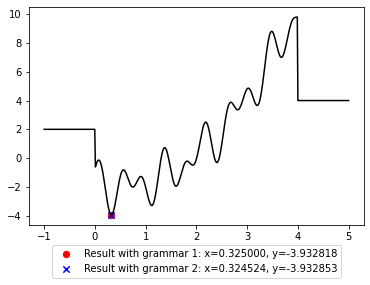

In [42]:
plt.plot(x, y, c='black');
plt.scatter(x1, y1, marker='o', s=40, c='red',
            label='Result with grammar 1: x={:.6f}, y={:.6f}'.format(x1, y1))
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

It is possible to look closer into the valley of the global minimum to see where exactly the two solutions lie.

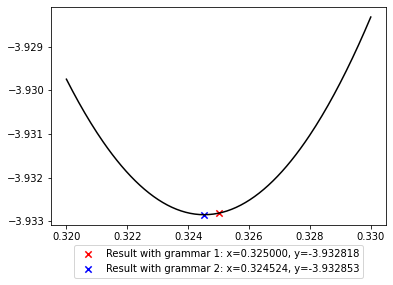

In [43]:
x_zoom = np.linspace(0.32, +0.33, 200)
y_zoom = [f(xi) for xi in x_zoom]

plt.plot(x_zoom, y_zoom, c='black');
plt.scatter(x1, y1, marker='x', s=40, c='red',
            label='Result with grammar 1: x={:.6f}, y={:.6f}'.format(x1, y1))
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

Note that grammar1 defines a finite search space with numbers that have three digits after the comma, while grammar2 defines an infinite search space of all float numbers expressible in Python. For this reason, grammar2 contains strings that is closer to the true minimum of the function, but they are harder to find due to the infinite amount of other numbers in the search space. The choice of search space therefore matters 1) in how well a solution can be and 2) how easy it is to find a good solution.

#### Changing the search goal

It is easy to change the `objective` to search for the maximum of the function instead of the minimum. It is also possible to see the progress of the search by printing output with `verbose`.

In [44]:
# grammar1
ea = al.EvolutionaryAlgorithm(grammar1, objective_function, 'max', max_generations=50, verbose=True)
best_individual = ea.run()

string1 = best_individual.phenotype
x1 = eval(string1)
y1 = f(x1)

print('String: ', string1)
print('x:      ', x1)
print('y:      ', y1)

Progress         Generations      Evaluations      Runtime (sec)    Best fitness    
..... .....      10               852              0.1              9.815625932116355
..... .....      20               1398             0.2              9.815625932116355
..... .....      30               1750             0.2              9.815625932116355
..... .....      40               2102             0.3              9.815625932116355
..... .....      50               2410             0.3              9.815625932116355


Finished         50               2410             0.3              9.815625932116355
String:  3.999
x:       3.999
y:       9.815625932116355


In [45]:
# grammar2
ea = al.EvolutionaryAlgorithm(grammar2, objective_function, 'max', max_generations=50, verbose=True)
best_individual = ea.run()

string2 = best_individual.phenotype
x2 = eval(string2)
y2 = f(x2)

print('String: ', string2)
print('x:      ', x2)
print('y:      ', y2)

Progress         Generations      Evaluations      Runtime (sec)    Best fitness    
..... .....      10               966              0.6              9.817225689270378
..... .....      20               1760             0.7              9.817225689270378
..... .....      30               2238             0.8              9.817225689270378
..... .....      40               2703             0.8              9.817225689270378
..... .....      50               3183             0.9              9.817225689270378


Finished         50               3183             0.9              9.817225689270378
String:  4.
x:       4.0
y:       9.817225689270378


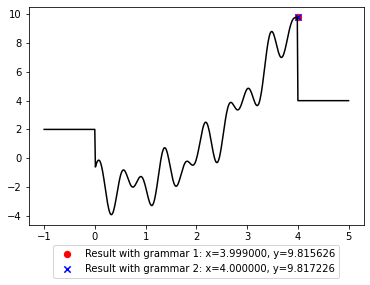

In [46]:
plt.plot(x, y, c='black');
plt.scatter(x1, y1, marker='o', s=40, c='red',
            label='Result with grammar 1: x={:.6f}, y={:.6f}'.format(x1, y1))
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

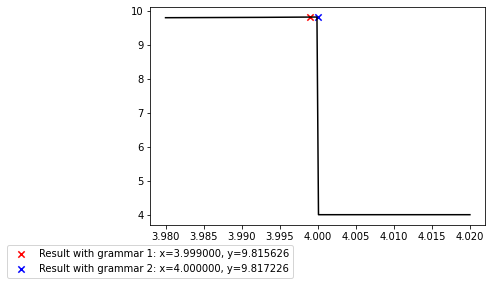

In [47]:
x_zoom2 = np.linspace(3.98, 4.02, 200)
y_zoom2 = [f(xi) for xi in x_zoom2]

plt.plot(x_zoom2, y_zoom2, c='black');
plt.scatter(x1, y1, marker='x', s=40, c='red',
            label='Result with grammar 1: x={:.6f}, y={:.6f}'.format(x1, y1))
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.07));

It is also simple to change the `objective_function` in order to search for positions where the function assumes a certain value such as zero. The trick is to use the deviation from the desired value as returned fitness and then minimize it.

In [48]:
def objective_function2(string):
    """Assign a quality score to a string of the grammar's language."""
    # Evaluate the string, which in the case of our grammars results in a number
    x = eval(string)

    # Insert that number into the numerical function
    y = f(x)
    
    # Return the deviation from the desired value of the numerical function
    return abs(y - 0.0)

In [49]:
# grammar1
ea = al.EvolutionaryAlgorithm(grammar1, objective_function2, 'min', max_generations=200)
best_individual = ea.run()

string1 = best_individual.phenotype
x1 = eval(string1)
y1 = f(x1)

print('String: ', string1)
print('x:      ', x1)
print('y:      ', y1)

String:  2.451
x:       2.451
y:       0.004630668041808672


In [50]:
# grammar2
ea = al.EvolutionaryAlgorithm(grammar2, objective_function2, 'min', max_generations=200)
best_individual = ea.run()

string2 = best_individual.phenotype
x2 = eval(string2)
y2 = f(x2)

print('String: ', string2)
print('x:      ', x2)
print('y:      ', y2)

String:  2.006_17150_23_63_06_00_08_15_081_997_7_20_002_17150_23_63_0_6_15_08_2_69_7_0_80_04_7_2
x:       2.00617150236306
y:       4.884981308350689e-15


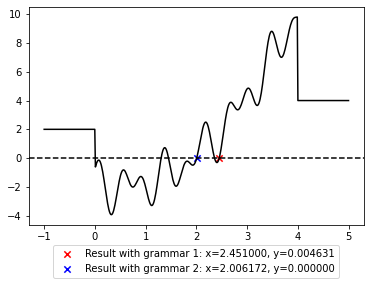

In [51]:
plt.plot(x, y, c='black');
plt.scatter(x1, y1, marker='x', s=40, c='red',
            label='Result with grammar 1: x={:.6f}, y={:.6f}'.format(x1, y1))
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

Note that there are several `x` values where `y` is zero and only one of them is returned in form of the best individual in a single run. It is possible that another run would return another solution. It is also possible that a single run discovers several solutions, which can be found out by inspecting all data generated throughout a run, as will be shown later.

#### Using different G3P systems

Many Grammar-Guided Genetic Programming (G3P) systems were developed by research groups and alogos provides several well-known and recent ones to cover the state of the art. The evolutionary algorithm can use all of these systems. Choosing a different system means that the genotype representation, genotype-to-phenotype mapping and variation operators are switched to those provided by that system. The user can select which system to choose with the argument `system`, where following values are currently available:

- `'cfggp'` = Context-Free Grammar Genetic Programming
- `'cfggpst'` = Context-Free Grammar Genetic Programming with Serialized Trees
- `'dsge'` = Dynamic Structured Grammatical Evolution
- `'ge'` = Grammatical Evolution
- `'pige'` = Position-independent Grammatical Evolution
- `'whge'` = Weighted Hierarchical Grammatical Evolution

Let's use all of them on our example problem:

In [52]:
results = dict()
for system in ('cfggp', 'cfggpst', 'dsge', 'ge', 'pige', 'whge'):
    ea = al.EvolutionaryAlgorithm(grammar1, objective_function, 'min', max_generations=10,
                                  system=system)
    best_individual = ea.run()
    string = best_individual.phenotype
    xs = eval(string)
    ys = f(xs)
    results[system] = (xs, ys)

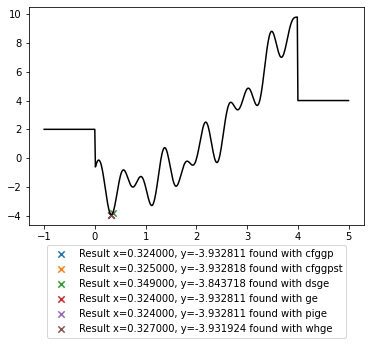

In [53]:
plt.plot(x, y, c='black');
for system, (xs, ys) in results.items():
    plt.scatter(xs, ys, marker='x', s=40,
                label='Result x={:.6f}, y={:.6f} found with {}'.format(xs, ys, system))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

Note that such a toy problem and only a single run are not suitable to compare the performance of these systems. To assess their relative performance a collection of suitable benchmarks needs to be selected, multiple runs need to be performed possibly with different parameter settings, and the evaluation of the results requires proper statistical analysis rather than visual comparison.

#### Storing a run to analyze it

Alogos also comes with the option to store the data produced throughout a run of an evolutionary algorithm in an in-memory or file-based SQLite database for later analysis and visualization. This is especially useful for searches with slow objective functions such as physical simulations, which may lead to long-running searches where detailed post hoc analysis could inform further experimental designs.

The argument `database_on=True` activates the storing of results. The argument `database_location` can be used to provide a filepath, otherwise an in-memory database is used, which is faster but lost when the interpreter is stopped.

In [54]:
ea = al.EvolutionaryAlgorithm(grammar2, objective_function, 'min', max_generations=10,
                              population_size=12, offspring_size=10, 
                              system='ge', database_on=True, database_location='ea_run1.sql')
best_individual = ea.run()

string2 = best_individual.phenotype
x2 = eval(string2)
y2 = f(x2)

print('String: ', string2)
print('x:      ', x2)
print('y:      ', y2)

String:  .3_23_4_8_7
x:       0.323487
y:       -3.932689449737173


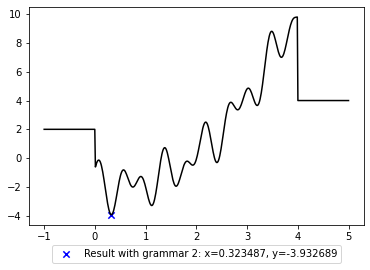

In [55]:
plt.plot(x, y, c='black');
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

The evolutionary algorithm object has a `state` attribute that always keeps track of some observations.

In [56]:
print(ea.state)

╭─ State of the evolutionary search
│ Start time ................................ 2022-12-07 02:09:10 UTC
│ Stop time ................................. 2022-12-07 02:09:10 UTC
│
│ Number of generations ..................... 10
│ Number of individuals ..................... 390
│ Number of genotype-phenotype evaluations .. 88
│ Number of phenotype-fitness evaluations ... 68
│
│ Minimal fitness ........................... -3.932689449737173
│ Maximal fitness ........................... 7.604845884683039
╰─


Only if the argument `database_on=True` was passed to the evolutionary algorithm, the `database` attribute points to an object with many methods to inspect a finished run in much detail.

In [57]:
print(ea.database)

╭─ Database of the evolutionary search
│ Number of changes ............ 546
│ Number of generations ........ 10
│ Number of individuals ........ 390
│ Number of unique genotypes ... 94
│ Number of unique phenotypes .. 69
│ Number of unique fitnesses ... 41
│ Minimum population size ...... 12
│ Maximum population size ...... 12
│ Minimum fitness .............. -3.932689
│   shared by 5 individuals, 1 genotypes, 1 phenotypes
│ Maximum fitness .............. 7.604846
│   shared by 2 individuals, 1 genotypes, 1 phenotypes
│
│ First individual with minimum fitness -3.932689
│   GE individual:
│   - Genotype: (218,12,223,3,224,224,90,218,192,17)
│   - Phenotype: .3_23_4_8_7
│   - Fitness: -3.932689449737173
│
│ First individual with maximum fitness 7.604846
│   GE individual:
│   - Genotype: (218,12,12,223,3,86,69,218,192,17)
│   - Phenotype: 3.6
│   - Fitness: 7.604845884683039
╰─


The main data about the seach can be exported as a simple table in a CSV file, e.g. for manual inspection with a spreadsheet application.

In [58]:
ea.database.export_csv('ea_run1.csv')

'ea_run1.csv'

One of the available methods returns all unique phenotypes that were generated throughout a search. In our case, this allows to see all numbers that were used as `x` values, which means it can be easily visualized on a function plot how the search algorithm explored the space.

In [59]:
phenotypes = ea.database.phenotypes()
print('Number of unique phenotypes used throughout the run:', len(phenotypes))
print()
print(phenotypes)

Number of unique phenotypes used throughout the run: 69

['467E-467', '7.', '.1_141e-8', '3.', '5_8.E-3', '1.e-13', '8.6E7', '0.', '6.', '4_2E7', '9E7', '26E-3', '5_332_8.e-6', '', '3.e-13', '54.E-3', '8.6e-7', '1E447', '8.e-95_3', '.2_182e-8', '467E467', '42E0', '1.', '.0_140e-8', '23E-3', '0_9.', '4.E-11', '9_318_0.e-6', '463E-463', '5e-8', '5_8.E+1', '1.e+83', '4_9e+3', '.3_7', '067.', '5_635.e8', '.37_23', '4_9e7', '4_9e-3', '4_33E-4_33', '.36_23', '.36', '4_73E-4_73', '.3_28', '28.', '97.9', '.398', '.3', '3.6', '8.', '2e-39', '.38_34_8', '3.3', '36.', '2.', '.3_2', '.368', '.34', '.38', '33.', '.3_3_8', '.2', '2.3_2', '9_7.7E0', '.32', '.3_23_4_8_7', '.3_78', '3_28.2_0', '0.88_4']


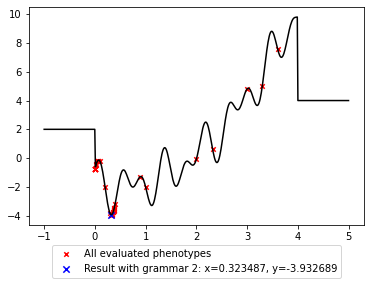

In [60]:
xphe = [eval(s) for s in phenotypes if s]
xphe = [xi for xi in xphe if xi > min(x) and xi < max(x)]
yphe = [f(xi) for xi in xphe]

plt.plot(x, y, c='black');
plt.scatter(xphe, yphe, marker='x', s=20, c='red',
            label='All evaluated phenotypes')
plt.scatter(x2, y2, marker='x', s=40, c='blue',
            label='Result with grammar 2: x={:.6f}, y={:.6f}'.format(x2, y2))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07));

It is also possible to plot all individuals that were generated in a run and how they were used. For example, some may have been selected as parents and underwent crossover and mutation to give rise to new individuals, while others may have been kept as they were for several generations because they got selected as survivors. In runs with many generations or large population sizes a lot of individuals are generated and the visualization would get too large. For this reason it is possible to inspect only a certain range of generations with the argument `generation_range=(a, b)` where for example choosing `a=0` and `b=3` would display generation 0, 1, 2 and 3.

In [61]:
ea.database.plot_genealogy()

Explanation of the plot and its colors: 

- Objects
  
  - Each dot represents an individual. Hovering with the mouse over it shows its phenotype and fitness.
  - Each line represents 1) the selection of an individual as parent or survivor or 2) the variation of an individual's genotype during crossover or mutation.
  - The lower half of the plot with the big dots represents one generaiton after another from left to right, where dots stacked on top of each other belong to the same generation.
  - The upper half of the plot shows 1) Which individuals were selected as parents, 2) how they were recombined via crossover, 3) how they were modified via mutation and 4) which individuals were selected as survivors and therefore moved on into the next generation.

- Colors
  
  - Green dot: An individual with a novel phenotype was discovered.
  - Green line: An offspring individual with a novel phenotype was chosen during survivor selection to become part of the next generation and is also highlighted there with a green dot to make it easier to spot where useful novelty was introduced.
  - Red line: A variation event (crossover or mutation) led to a new individual with a different genotype. Variation operators are often probabilistic, so it is possible that a call to a mutation function does not affect any part of the genotype, or even if it modifies something, the result may be identical to the original genotype.

#### Speedup by caching and parallelization

An evolutionary algorithm has two aspects that can be easily optimized:

- Caching: The evolutionary algorithm needs to calculate two functions for each individual.

  1. It maps a genotype to a phenotype with the mapping function provided by a G3P system.
  2. It maps a phenotype to a fitness with the objective function provided by a user.

  The same genotype or the same phenotype can be present in many individuals throughout a run. This means the mapping function and objective function would be calculated repeatedly on the same inputs. A simple speedup is to use caching in order to remember the results for the inputs that have already been seen and look it up rather than recalculate it. This is done automatically by alogos. Following parameters can be used to turn it off or change the cache size, i.e. the number of remembered input-output pairs:
  
    - `gen_to_phe_cache_lookup_on`: whether genotype-to-phenotype caching is activated, `True` by default
    - `gen_to_phe_cache_size`: size of the genotype-to-phenotype cache
    - `phe_to_fit_cache_lookup_on`: whether phenotype-to-fitness caching is activated, `True` by default
    - `phe_to_fit_cache_size`: size of the phenotype-to-fitness cache

  If a database was set up to remember search results, it is by default also used to look up prior phenotype-to-fitness evaluations that are not part of the cache anymore (or if the cache was deactivated). The reason for this is that objective functions in real-world problems are often very computationally demanding, so even a database lookup is usually much faster than a recalculation of a previous result. To turn this behavior off, following argument is available:
  
    - `phe_to_fit_database_lookup_on`: whether phenotype-to-fitness lookup in the database is activated, `True` by default

- Parallelization: A population contains many individuals, which all need to be evaluated with the objective function in order to assign fitness values to them. Since the individuals are independent, their evaluation can be easily calculated at the same time, either in parallel on one machine or distributed on several machines. This is not done automatically by alogos, but there is simple support for it with the `evaluator` argument and the external package `unified_map`. It only makes sense to use this option if the objective function is computationally demanding, which means that it takes in the order of seconds or longer to compute it, rather than just a few milliseconds. Otherwise the overhead of parallelization would be larger than the gain it can provide.

The package `unified_map` provides different evaluation methods that can evaluate a function in a serial, parallel or distributed fashion. Such a method accepts a function plus a list of inputs and returns a list of outputs. Each output is generated by applying the function to the input at the same list position. The function can be applied to one input after another, but for a speedup it can also be applied in parallel on a single machine or in a distributed way on several machines. The following is a simple example to make it clearer:

In [62]:
import time

import unified_map as um

def g(x):
    time.sleep(1)  # slow
    return x**2

inputs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(inputs)
outputs = um.univariate.parallel.futures(g, inputs)  # calculate a slow function on each argument in parallel
print(outputs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


The evolutionary algorithmin alogos has an `evaluator` argument, which accepts each method provided by unified_map that works on univariate functions. It is also possible to implement an evaluator yourself. The following are two alternative implementations of a simple serial evaluator that applies the function to one argument after another. This is what alogos does by default when evaluating the objective function on each individual of a population. If the objective function is computationally demanding, it is faster if a parallel or distributed evaluator is used instead.

In [63]:
def list_evaluator(f, inputs):
    results = []
    for x in inputs:
        y = f(x)
        results.append(y)
    return results


def list_comprehension_evaluator(f, inputs):
    return [f(x) for x in inputs]

In [64]:
# serial evaluator
ea = al.EvolutionaryAlgorithm(grammar2, objective_function, 'min', max_generations=50,
                              evaluator=list_evaluator)
best_individual = ea.run()

string2 = best_individual.phenotype
x2 = eval(string2)
y2 = f(x2)

print('String: ', string2)
print('x:      ', x2)
print('y:      ', y2)

String:  .3_2452412_0
x:       0.32452412
y:       -3.9328526411217624


In [65]:
# parallel evaluator
ea = al.EvolutionaryAlgorithm(grammar2, objective_function, 'min', max_generations=50,
                              evaluator=um.univariate.parallel.multiprocessing)
best_individual = ea.run()

string2 = best_individual.phenotype
x2 = eval(string2)
y2 = f(x2)

print('String: ', string2)
print('x:      ', x2)
print('y:      ', y2)

String:  .3_245_2_4_1
x:       0.3245241
y:       -3.9328526411217144


## Conclusion

This getting started tutorial covered the three main steps required to define and solve an optimization problem with [alogos](package_references.html) in some detail:

1. Define a search space with a grammar.
2. Define a search goal with an objective function and objective.
3. Use a search method to find an optimal string in the grammar's language according to the objective function and objective.

## Further resources

To get an idea what kind of problems can be tackled with alogos, there is a collection of [Code Examples](examples.html).

To see what optional arguments can be passed to the classes and methods used in this tutorial and the examples, the [API Documentation](../autoapi/index.html) provides a detailed description of all functionality that can be accessed in alogos.